<table align="left">
  <td>
    <a href="https://is.gd/2PddV3" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

 # Regresión líneal con Scikit-Learn

Los modelos lineales son fundamentales tanto en estadística como en el aprendizaje automático, pues muchos métodos se apoyan en la combinación lineal de variables que describen los datos. Lo más sencillo será ajustar una línea recta con **LinearRegression**, pero veremos que contamos con un abaníco mucho más grande de herramientas.

Para mostrar cómo funcionan estos modelos vamos a emplear uno de los dataset que ya incorpora **scikit-learn**.

**[Scikit-Learn](https://scikit-learn.org/stable/index.html)** es una biblioteca para aprendizaje automático de software libre para el lenguaje de programación Python. ​Incluye varios algoritmos de clasificación, regresión y análisis de grupos entre los cuales están máquinas de vectores de soporte, bosques aleatorios, Gradient boosting, K-means y DBSCAN. Está diseñada para interoperar con las bibliotecas numéricas y científicas NumPy y SciPy.

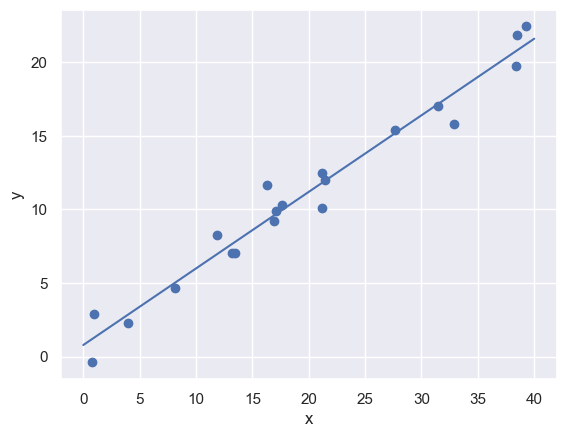

In [1]:
"""
Regresión línea simple
"""

# importando pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

#Seaborn is a Python data visualization library based on matplotlib. 
import seaborn as sns
sns.set()


def plot_linear_regression():
    a = 0.5
    b = 1.0

    x = 40 * np.random.random(20)

    y = a * x + b + np.random.normal(size=x.shape)

    clasificador_lineal = LinearRegression()
    clasificador_lineal.fit(x[:, None], y)

    x_new = np.linspace(0, 40, 100)
    y_new = clasificador_lineal.predict(x_new[:, None])

    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.axis('tight')
    
plot_linear_regression()
plt.show()

# **Regresión Lineal**
Se utiliza para estimar los valores reales (costo de las viviendas, el número de llamadas, ventas totales, etc.) basados en variables continuas. La idea es tratar de establecer la relación entre las variables independientes y dependientes ajustando la mejor línea recta con respecto a los puntos. Esta línea de mejor ajuste se conoce como línea de regresión.

Veamos un pequeño ejemplo de como se implementa en Python. En este ejemplo voy a utilizar el dataset Boston que ya viene junto con Scikit-learn y es ideal para practicar con Regresiones Lineales; el mismo contiene precios de casas de varias áreas de la ciudad de Boston.

[fuente](https://www.kaggle.com/henriqueyamahata/boston-housing-with-linear-regression)


# **Dataset**: Pandas
Estructuración del dataset

In [15]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [21]:
boston_df = pd.DataFrame(data, columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
boston_df['TARGET'] = pd.DataFrame(target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


El Boston dataset es un conjunto de datos para el análisis de los precios de las viviendas en la región de Boston. Con boston.DESCR podemos obtener una descripción del dataset, con información sobre el mismo, como el tipo de atributos.

**Descripción de los parametros del dataset.**

* CRIM: Índice de criminalidad per cápita por ciudad
* ZN: Proporción de suelo residencial para lotes de más de 25.000 pies cuadrados
* INDUS: Proporción de acres comerciales no minoristas por ciudad
* CHAS: Variable ficticia del río Charles (= 1 si la zona linda con el río; 0 en caso contrario)
* NOX: Concentración de óxido nítrico (partes por 10 millones)
* RM: Número medio de habitaciones por vivienda
* AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
* DIS: Distancias ponderadas a cinco centros de empleo de Boston
* RAD: Índice de accesibilidad a las autopistas radiales
* TAX: Tasa de impuesto sobre la propiedad por valor total de 10.000 $.
* PTRATIO: Ratio de alumnos por profesor por ciudad
* Bk: 1000(Bk - 0,63)², donde Bk es la proporción de [personas de origen afroamericano] por ciudad
* LSTAT: Porcentaje de la población de menor estatus
* **Target (MEDV): Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares**. 

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#Preprocesamiento de los Datos

Es buena practica verficiar si hay valores de datos faltantes dentro del dataset.

In [6]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

# **Análisis exploratorio de datos**

El análisis exploratorio de datos es un paso muy importante antes de entrenar el modelo. En esta sección, utilizaremos algunas visualizaciones para comprender la relación de la variable objetivo con otras características.

**Primero graficaremos la distribución de la variable objetivo MEDV**. 

Usaremos la función de **distplot** de la biblioteca del **seaborn**.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


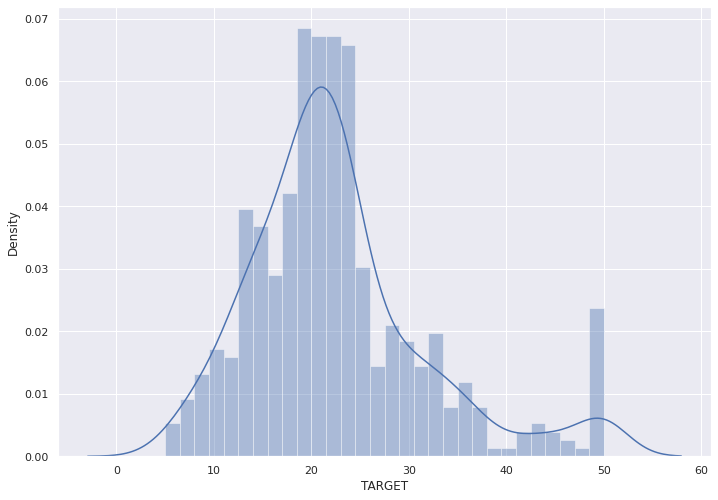

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_df['TARGET'], bins=30)
plt.show()

Vemos que los valores de **MEDV** se distribuyen normalmente con pocos valores atípicos.

A continuación, creamos una matriz de correlación que mide las relaciones lineales entre las variables. La matriz de correlación se puede formar usando la función **corr** de la biblioteca de datos de pandas. Usaremos la función **heatmap** de la biblioteca de **seaborn** para trazar la matriz de correlación.

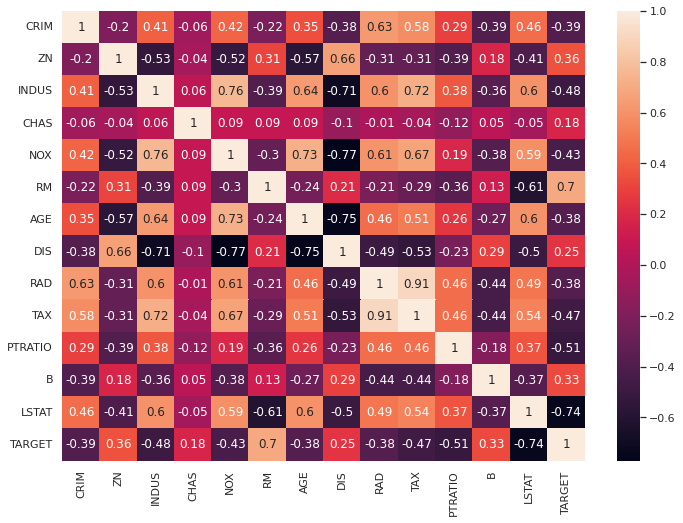

In [ ]:

correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

El coeficiente de correlación oscila entre -1 y 1. Si el valor está cerca de 1, significa que hay una fuerte correlación positiva entre las dos variables. Cuando está cerca de -1, las variables tienen una fuerte correlación negativa.

## **Observación**

*   Para ajustar un modelo de regresión lineal, seleccionamos aquellas características que tienen una alta correlación con nuestra variable objetivo **MEDV**. Observando la matriz de correlación podemos ver que **RM**(average number of rooms per dwelling (viviendas)) tiene una fuerte correlación positiva con **MEDV** (0,7), mientras que **LSTAT**(proportion of adults without, some high school education and proportion of male workers classified as laborers) tiene una alta correlación negativa con **MEDV** (-0,74).

* Un punto importante en la selección de características para un modelo de regresión lineal es la comprobación de la multilinealidad. Las características RAD, TAX tienen una correlación de 0,91. Estos pares de características están fuertemente correlacionados entre sí. No deberíamos seleccionar estas dos características juntas para entrenar el modelo.Lo mismo ocurre con las características DIS y AGE, que tienen una correlación de -0,75.


Basándonos en las observaciones anteriores, tomaremos el **RM** y el **LSTAT** como nuestras características. Usando un gráfico de dispersión veamos cómo estas características varían con el **MEDV**.




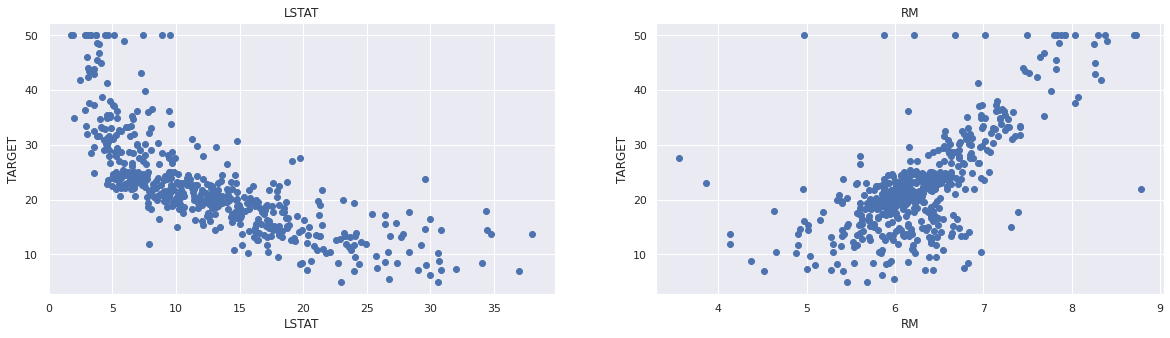

In [9]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston_df['TARGET']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('TARGET')

## **Observación**

* Los precios aumentan a medida que el valor del RM aumenta linealmente. Hay pocos valores atípicos y los datos parecen estar limitados a 50.
* Los precios tienden a disminuir con el aumento de la LSTAT. Aunque no parece estar siguiendo exactamente una línea recta.

#Preparando los datos para el entrenamiento del modelo

1. Concatenamos las columnas LSTAT y RM utilizando np.c_ proporcionado por la biblioteca numpy.
2. Entrenamiento del modelo con dos características.

In [10]:
X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT','RM'])
Y = boston_df['TARGET']
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


# **Dividir los datos en conjuntos de entrenamiento y pruebas**
A continuación, dividimos los datos en conjuntos de entrenamiento y pruebas. Entrenamos el modelo con el 80% de las muestras y lo probamos con el 20% restante. Hacemos esto para evaluar el rendimiento del modelo con datos no vistos. Para dividir los datos utilizamos la función **train_test_split** proporcionada por la biblioteca scikit-learn. Finalmente imprimimos los tamaños de nuestro conjunto de entrenamiento y pruebas para verificar si la división se ha producido correctamente.


In [12]:
##Utilizar el paquete sklearn.model_selection
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento / prueba 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# **Entrenando Modelo**
Ya tenemos los datos, vamos a ajustar una línea recta para ver cuál es la tendencia que siguen los precios en función del atributo.

Lo primero es importar LinearRegression y crear un objeto.

Enlace librería: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


Una vez tenemos claro el modelo a emplear, el siguiente paso es entrenarlo con los datos de variables independientes y variables dependientes que tenemos. Para ello, en scikit-learn tenemos funciones del tipo:

modelo.fit(X, Y)

In [13]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, Y_train)

LinearRegression()

# Evaluación del modelo

El modelo se evaluará utilizando **RMSE y $R^2-score$**.

1. **RMSE:** Indica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de datos observados de los valores predichos del modelo. En este ejemplo si el resultado del RMSE se multiplica por $1000, se tiene el error en dinero exacto. 

2. **$R^2-score$:**  Tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medio y 1 indica una predicción perfecta. Este coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo. 

[Fuente](https://ichi.pro/es/cuales-son-las-diferentes-formas-de-evaluar-un-modelo-de-regresion-lineal-209018250907954)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation for training set
y_train_predict = modelo.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = modelo.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


#Entrenamiento del modelo con una característica

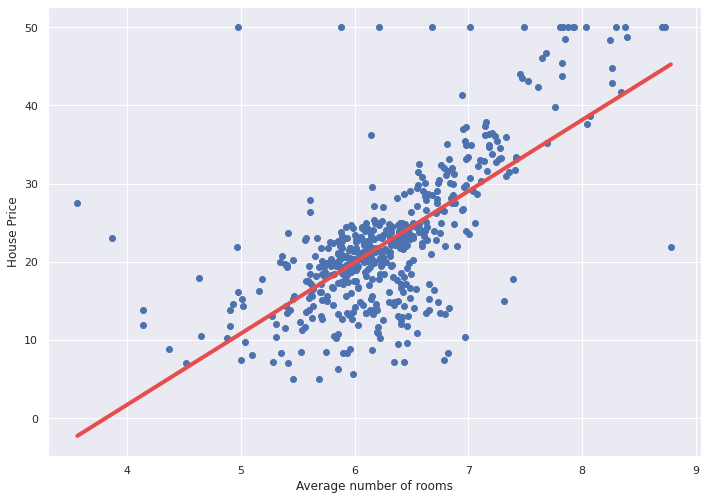

In [15]:
X = boston_df['RM']
X = np.transpose(np.atleast_2d(X))
Y = boston.target

lr = LinearRegression(fit_intercept=True)

lr.fit(X, Y)


fig,ax = plt.subplots()
ax.set_xlabel("Average number of rooms")
ax.set_ylabel("House Price")
ax.scatter(X, Y)
xmin = X.min()
xmax = X.max()

ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]])  , '-',color=(.9,.3,.3), lw=4)
plt.show()

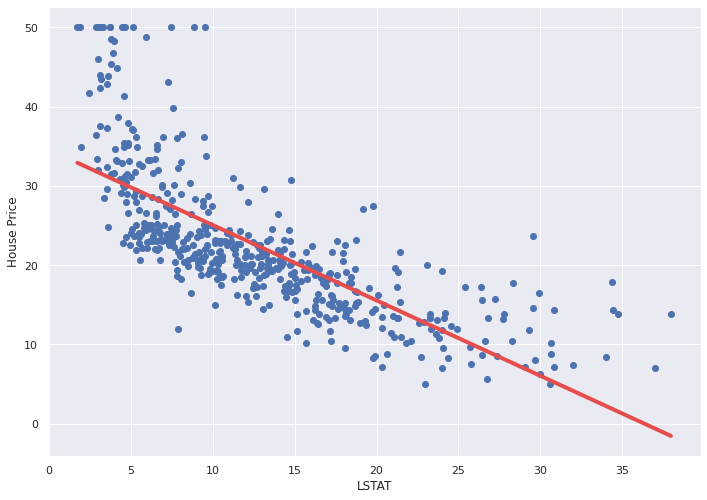



Rendimiento de la relacionando LSTAT-House Price: 0.5441462975864797


In [16]:
x = boston_df['LSTAT']
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression(fit_intercept=True)

lr.fit(x, y)

fig,ax = plt.subplots()
ax.set_xlabel("LSTAT")
ax.set_ylabel("House Price")
ax.scatter(boston_df['LSTAT'], boston.target)
xmin = x.min()
xmax = x.max()
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]) , '-',color=(.9,.3,.3), lw=4)
plt.show()

rendimimiento = lr.score(x,y) # devuelve el coeficiente R2
print("\n")
print("Rendimiento de la relacionando LSTAT-House Price:", rendimimiento)



# Preguntas y Actividades. 

**Comprobar las siguientes preguntas**

1. Se podría mejorar el rendimiento de la regresión que asocia LSTAT y House Price utilizando una regresión polinomial?. 

2. Se realizó el entrenamiento del modelo de regresión líneal inicial utilizando solamente dos características del dataset, que ocurriría si se utilizan todas las características del mismo. ¿mejoraría el rendimiento del modelo?

3. Repita el paso anterior, utilizando como entrada del modelo solo las caracterterísticas que tienen una correlación con el precio de las casas mayor a 0.5 o -0.5. Tenga en cuenta la recomendación dada en este cuaderno con las caracteristicas que tienen alta correlación con otra característica que no sea el Target. ¿mejoraría el rendimiento del modelo?

4. Muestre los coeficientes asignados por el modelo a cada una de las características de los puntos 2 y 3. ¿Cuales son sus conclusiones a partir del resultado visualizado? (**modelo.coef_**) 
5. Mejoraría el rendimiento del modelo aplicando la transformación de las caracteristicas? es decir, aplicando normalización. 